In [2]:
from Peakfit import Fitter

In [3]:
import numpy as np
2*np.sqrt(2*np.log(2))

np.float64(2.3548200450309493)

In [4]:
Bob = Fitter()

[0, 10, 0, 1]
[0, 10, 0, 1]


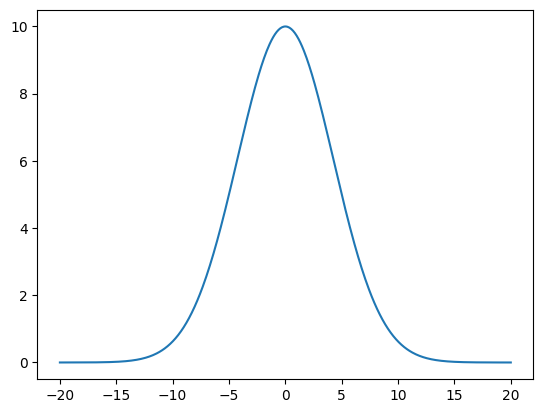

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
x = np.linspace(-20,20,500)
args = Bob.getargs()
print(args)
y = Bob.fitfunct(x,args)

plt.plot(x,y)

fitparameters before fitting [0, 10, 1, 0]
fit parameters after fit [-0.99304366  0.99493211 11.16958388  0.47300009]
[np.float64(-0.9930436610441734), np.float64(0.99493211412636), np.float64(11.169583877240553), np.float64(0.47300008687632233)]
Gauss


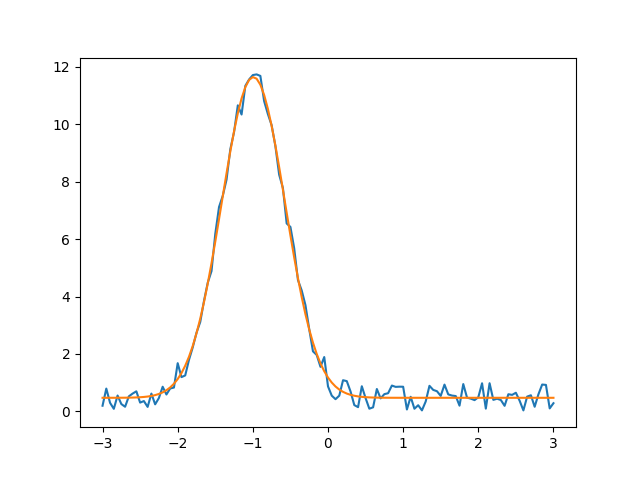

In [78]:
import matplotlib.pyplot as plt 
import numpy as np 
from Peakfit import Fitter 
def gaussnoise(x,centroid,A,FWHM,N):
    noise =np.random.random(len(x))*N
    sig = FWHM/(2*np.sqrt(2*np.log(2)))
    return A*np.exp(-((x-centroid)**2/(2*sig**2)))+noise
xstart =-3
xend  = 3 
xres = 121
x = np.linspace(xstart,xend,xres)
centroid = -1
A = 11
FWHM = 1.00
N =1
y =  gaussnoise(x,centroid,A,FWHM,N)
f = Fitter()

f.fit1d(x,y)

fig,ax = plt.subplots(1)
ax.plot(x,y)
args = f.getargs()
print(args)
fit = f.pltfunct(x)
ax.plot(x,fit)


In [4]:
#Message in a bottle 
#Mistakes I have Made a few 
%matplotlib widget

Lorentz
Gauss
Gauss
Gauss
fitparameters before fitting [0, 10, 1, 0]
fit parameters after fit [-1.62001718e-01  1.23318476e-01  8.88585002e+02  1.34129158e+01]
[np.float64(-0.16200171779764583), np.float64(0.1233184758820863), np.float64(888.5850021716927), np.float64(13.412915796879423)]
Gauss


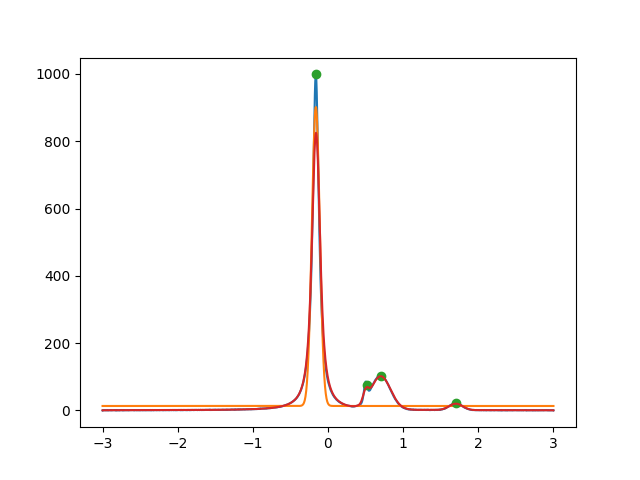

In [79]:
import matplotlib.pyplot as plt 
import numpy as np 
from Peakfit import Fitter 
def mpeaknoise(x,centroids,As,FWHMs,N,Types):
    noise =np.random.random(len(x))*N
    signal = Fitter()
    signal.centroid=centroids
    signal.FWHM=FWHMs
    signal.A = As 
    signal.fittype = Types
    y0 = 0
    return signal.pltfunct(x)+noise
xstart =-3
xend  = 3 
xres = 1201
x = np.linspace(xstart,xend,xres)
types =     ['Lorentz','Gauss','Gauss','Gauss']
centroids = [-.162  ,.5     ,.7     ,1.7]
As =        [1000   ,50     ,100    ,20]
FWHMs =     [.1     ,.05    ,.3     ,.20]
N =1
y =  mpeaknoise(x,centroids,As,FWHMs,N,types)
f = Fitter()



xpeak,ypeak,filtered = f.peakid(x,y,filt='hanning',filtwidth=30,cutoff=5)
f.fit1d(x,y)

fig,ax = plt.subplots(1)
ax.plot(x,y)
args = f.getargs()
print(args)
fit = f.pltfunct(x)
ax.plot(x,fit)
ax.plot(xpeak,ypeak,'o')
ax.plot(x,filtered)

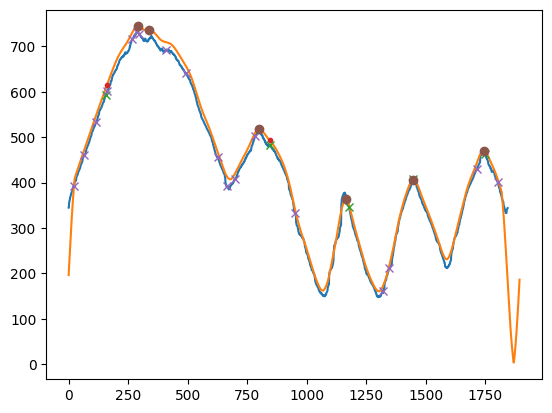

In [9]:
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import signal
from scipy import special

data = np.loadtxt('exampledata.csv')
window = signal.windows.gaussian(51, std=20)
filtered = signal.fftconvolve(window, data)
filtered = (np.average(data) / np.average(filtered)) * filtered
filtered = np.roll(filtered, -25)
plt.plot(data)
plt.plot(filtered)
peaks = signal.find_peaks_cwt(data,np.arange(100,200))
peaksf = signal.find_peaks_cwt(filtered,np.arange(100,200))
peaksrm = signal.argrelmax(data)
peaksfrm = signal.argrelmax(filtered)

plt.plot(peaks,data[peaks],"x")
plt.plot(peaksf,filtered[peaksf],'.')
plt.plot(peaksrm[0],data[peaksrm],"x")
plt.plot(peaksfrm[0],filtered[peaksfrm],'o')


[ 32 158 283] [ 1.6   7.9  14.15] [0.9995736  0.99894134 0.99991766]


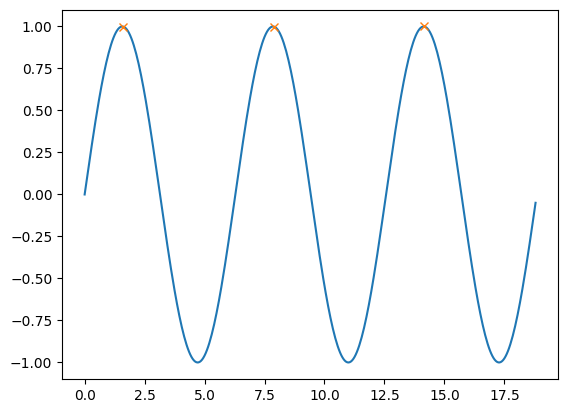

In [25]:
import numpy as np

from scipy import signal

xs = np.arange(0, 6*np.pi, 0.05)

data = np.sin(xs)

peakind = signal.find_peaks_cwt(data, np.arange(1,10))

print(peakind, xs[peakind], data[peakind])
plt.plot(xs,data)
plt.plot(xs[peakind],data[peakind],'x')

In [2]:
import sys
import importlib.metadata
def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = importlib.metadata.version(package_name)
    except importlib.metadata.PackageNotFoundError:
        version = '-1'
    return version

# pyTEMlib setup ------------------
if test_package('pyTEMlib') < '0.2024.5.0':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install --upgrade git+https://github.com/pycroscopy/pyTEMlib.git@main -q --upgrade
# ------------------------------
print('done')


done


In [3]:
test_package('pyTEMlib')

'0.2024.6.0'

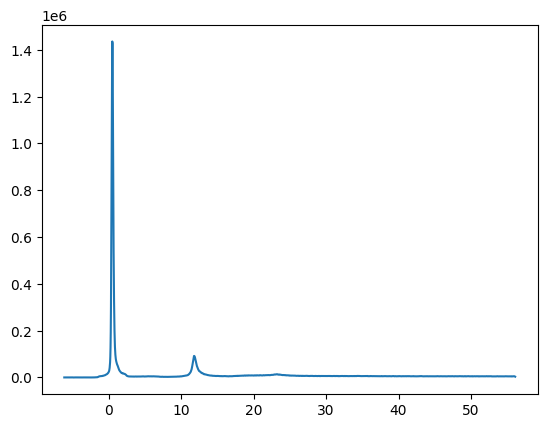

In [50]:
import matplotlib.pyplot as plt
plt.plot(data['Channel_000'].get_dimension_by_number(2)[0],data['Channel_000'][0,0])

In [51]:
data['Channel_000'].original_metadata

{'ImageData': {'Calibrations': {'Brightness': {'Origin': 0.0,
    'Scale': 1.0,
    'Units': 'Counts'},
   'Dimension': {'0': {'Origin': 0.0,
     'Scale': 0.0022761726286262274,
     'Units': 'µm'},
    '1': {'Origin': 0.0, 'Scale': 0.0022761726286262274, 'Units': 'µm'},
    '2': {'Origin': 201.5246124267578,
     'Scale': 0.030396046116948128,
     'Units': 'eV'}},
   'DisplayCalibratedUnits': 1},
  'Data': 'read',
  'DataType': 2,
  'Dimensions': {'0': 29, '1': 13, '2': 2048},
  'PixelDepth': 4},
 'ImageTags': {'Acquisition': {'Device': {'Active Size (pixels)': [2048, 2048],
    'Camera Number': 0,
    'CCD': {'Pixel Size (um)': [14.0, 14.0]},
    'Configuration': {'Transpose': {'Diagonal Flip': 0,
      'Horizontal Flip': 1,
      'Vertical Flip': 0}},
    'Name': 'US1000XP 1',
    'Source': 'US1000XP 1'},
   'Frame': {'Area': {'Transform': {'Class Name': 'cm_acquisitiontransform_list',
      'Transform List': {'0': {'Binning': [1, 1],
        'Class Name': 'cm_acquisitiontransform

In [65]:
%matplotlib widget

fitparameters before fitting [0, 10, 1, 0]
fit parameters after fit [-1.62001718e-01  1.23318476e-01  8.88585002e+02  1.34129158e+01]
[np.float64(-0.16200171779764583), np.float64(0.1233184758820863), np.float64(888.5850021716927), np.float64(13.412915796879423)]
Gauss


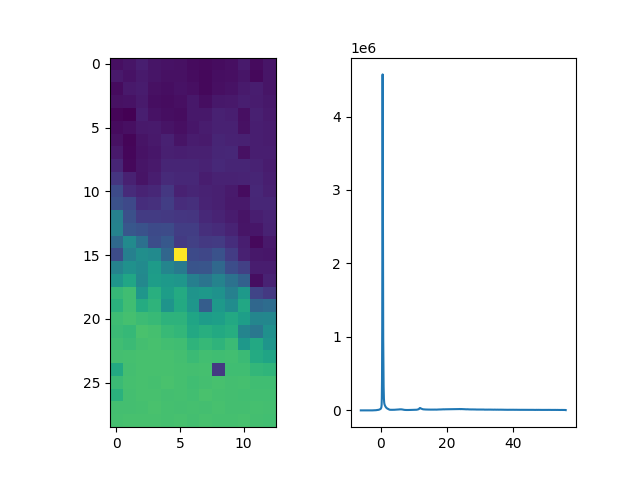

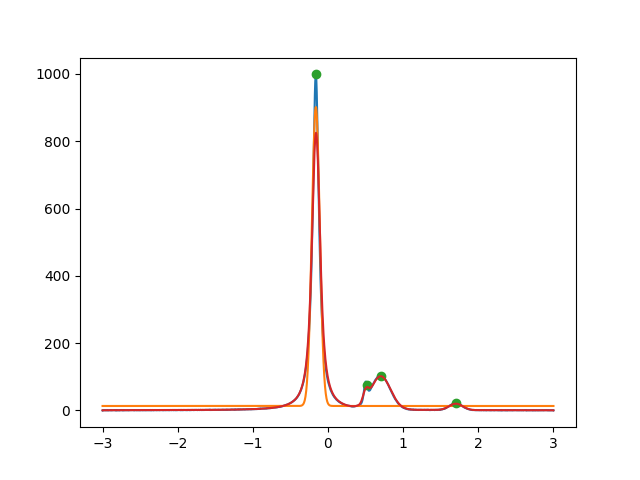

In [80]:
import pyTEMlib.file_tools as ft 
import matplotlib.pyplot as plt
import numpy as np 
directory = '/home/matthew/Desktop/TEM&EELS UTK MARCH23/2023-03-14-InP-Au-20230323T180533Z-001/2023-03-14-InP-Au/'
file = '12-eels.dm3'
data= ft.open_file(directory+file)
xdims = data['Channel_000'].get_dimension_by_number(0)[0]
ydims = data['Channel_000'].get_dimension_by_number(1)[0]
sdims = data['Channel_000'].get_dimension_by_number(2)[0]
pos = [15,5]

imagedata = np.max(data['Channel_000'],axis=2)

mask = np.zeros_like(imagedata)
mask[pos[0],pos[1]]= np.max(imagedata)
fig,ax = plt.subplots(1,2)
ax[0].imshow(imagedata+mask)

ax[1].plot(sdims,data['Channel_000'][pos[0],pos[1]])




f = Fitter()
xpeak,ypeak,filtered = f.peakid(x,y,filt='hanning',filtwidth=30,cutoff=5)
f.fit1d(x,y)

fig,ax = plt.subplots(1)
ax.plot(x,y)
args = f.getargs()
print(args)
fit = f.pltfunct(x)
ax.plot(x,fit)
ax.plot(xpeak,ypeak,'o')
ax.plot(x,filtered)

